#Chapter 8. Resonant Perturbations
##Action by Evelyn Zagarra Piedrahita, University of Antioquia

In this notebook we will present theory from the Resonant Perturbations and some interesting mathematical developments and simulations will be presented that will serve to better understand the text.

For details on the theory: SOLAR SYSTEM DYNAMICS by the authors Murray and Dermott





## Packages required

In [ ]:
# installing the packages
!pip install -q rebound spiceypy celluloid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.6 MB/s eta 0:00:00


## Importing packages

In [ ]:
# important libraries

import rebound 
import spiceypy as spy
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

## Section 8.2 The Geometry of resonance

Orbital resonance occurs when orbiting bodies exert regular, periodic gravitational influence on each other, usually because their orbital periods are related by a ratio of small integers. Most commonly, this relationship is found between a pair of objects (binary resonance).
A example of this is: [link text](https://en.wikipedia.org/wiki/Orbital_resonance#/media/File:Galilean_moon_Laplace_resonance_animation_2.gif)

There are two main types of resonances:

*  A **mean-motion orbital resonance** occurs when two bodies have periods of revolution that are a simple integer ratio of each other. Depending on the details, this can either stabilize or destabilize the orbit. Stabilization can occur when the two bodies move so synchronously that they never get too close.

For example:
The orbits of Pluto and the plutinos are stable, despite intersecting with that of the much larger Neptune, because they are in 2:3 resonance with it. The resonance ensures that as they approach perihelion and Neptune's orbit, Neptune is constantly distant (averaging a quarter of its orbit).

Orbital resonances can also destabilize one of the orbits. This process can be harnessed to find energy efficient ways to deorbit spacecraft.

For small bodies, destabilization is actually much more likely. For example:

In the asteroid belt within 3.5 AU of the Sun, the main mean-motion resonances with Jupiter are locations of gaps in the asteroid distribution, the Kirkwood gaps (especially at 4:1, 3:1, 5 :2, 7:3 and 2:1). Asteroids have been kicked out of these nearly empty lanes by repeated disturbances. However, there are still populations of asteroids temporarily present at or near these resonances.
*   A **secular resonance** occurs when the precession of two orbits is in sync (usually a perihelion precession or ascending node). A small body in secular resonance with a much larger one (for example, a planet) will precession at the same rate as the large body. Over a long time (a million years or so) a secular resonance will change the eccentricity and tilt of the small body.[link text](https://www.youtube.com/watch?v=WuuPoNZvThQ&ab_channel=MattClement)

Secular resonances are often studied to determine the long-term orbital evolution of asteroids and their families within the asteroid belt. A particularly well-known case is the secular resonance called v6, which determines the interaction of Saturn's orbital motion over the asteroid belt.

 


###**Jupiter and asteroid animation**

The idea of this notebook is to animate with simple conditions the orbit of the planet and the orbit of the asteroid that is in a 2:1 resonance with Jupiter.

### Experiment 1: Resonance visualization

It is intended to study the phenomenon of orbital resonance, from the concept that this occurs when the bodies in orbit exert a periodic and regular gravitational influence on each other, generally because their orbital periods are related by a ratio of small integers.

In this code we will try from the basic equations of celestial mechanics, using certain useful libraries and packages to be able to graph the orbit of an asteroid 2:1 with Jupiter and the orbit of Jupiter.

First, simple considerations are made regarding the dynamics of the bodies, the orbital elements of the asteroid or the planet are not taken into account, this in order to first understand the resonance, as is done in chapter 8 of the book.

Subsequently, the orbit of the planet and the asteroid will be animated, generating a simulation in time.

### Constants

#### initial condition



In [ ]:
x = 0
y = 0
x1 = 7.76e11
y1 = 0
x2 = 4.9e11
y2 = 0

#### Numerical and physical constants

In [ ]:
G = 6.67e-11 # gravitational constatnt [(m**3)(kg**-1)(s**-2)]
au = 1.496e11 # astronomical unit [m]
day = 86400 # [s]
year = 365.25*day # [s]

#### Astronomical constants

In [ ]:
Msun = 1.98e30 #Jupiter mass [kg]
Mjup = 1.9e27 # Sun mass [kg]
mu = G * Msun # gravitational parameter [(m**3)(s**-2)]

### Configuration of the system

Taking Kepler's third law 

$(n^2)(a^3)=mu$

and the relationship of the period and the mean motion

$T=\frac{2\pi}{n}$

#### Planet

#### basic properties of the planet´s orbit

In [ ]:
a_planet = 5.2038 * au # major semiaxis [m]
t_planet = np.linspace(0, 2*np.pi, 1000)

# eccentricity for a circular orbit, is not the true eccentricity of Jupiter's orbit
e_planet = 0 # eccentricity parameter []

# derived properties

# From Kepler's third law
n_planet = mu**(1/2) * a_planet**(-3/2) # mean motion [rad/s]
T_planet = 2*np.pi/n_planet # period [s]

print(f"the period of the planet: {T_planet} s = {T_planet/year} years")

the period of the planet: 375545568.6064863 s = 11.900320956171772 years


#### Asteroid

We started the resonance for that we describe the basic properties of the asteroid's orbit.

#### basic properties of the asteroid´s orbit

In [ ]:
p = 1 # any integer, in this case at the 2:1 resonance
q = 1 # any integer, in this case at the 2:1 resonance
e_asteroid = 0 # eccentricity for a circular orbit, is not the true eccentricity of asteroid orbit
T_asteroid = (p/(p+q)) * T_planet # asteroid period 
t_ast = np.linspace(0, 2*np.pi, 1000)

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

the period of the asteroid: 187772784.30324316 s = 5.950160478085886 years
the major semiaxis of the asteroid: 490417011526.3313 m = 3.278188579721466 au


### Simulation

We leave the time step fixed, just as we did not set the duration of the simulation.

We consider that the asteroid has no mass and that its eccentricity, like that of Jupiter, is equal to zero.


In [ ]:
# simulation creation with rebound

sim = rebound.Simulation()
sim.units = ("kg", "m", "s")
sim.add(m=Msun)
sim.add(m=0,a=a_asteroid,e=e_asteroid)
sim.add(m=Mjup,a=a_planet,e=e_planet)

### Test code

The code from here is test code, just to see if something works.

In [ ]:
# Calculate positions
x_planet = a_planet * (np.cos(t_planet) - e_planet)
y_planet = a_planet *  np.sqrt(1 - e_planet**2) * np.sin(t_planet)


x_ast = a_asteroid * (np.cos(t_ast) - e_asteroid)
y_ast = a_asteroid * np.sqrt(1 - e_asteroid**2) * np.sin(t_ast)

In [ ]:
# plot the orbits
sim.particles[0].xyz

[0.0, 0.0, 0.0]

In [ ]:
sim.particles[1].xyz

[490417011526.3313, 0.0, 0.0]

In [ ]:
for orbit in sim.calculate_orbits():
    print(orbit)

<rebound.Orbit instance, a=490417011526.3314 e=2.212019912935272e-16 inc=0.0 Omega=0.0 omega=0.0 f=0.0>
<rebound.Orbit instance, a=778488480000.0001 e=1.7539982387609772e-16 inc=0.0 Omega=0.0 omega=0.0 f=0.0>


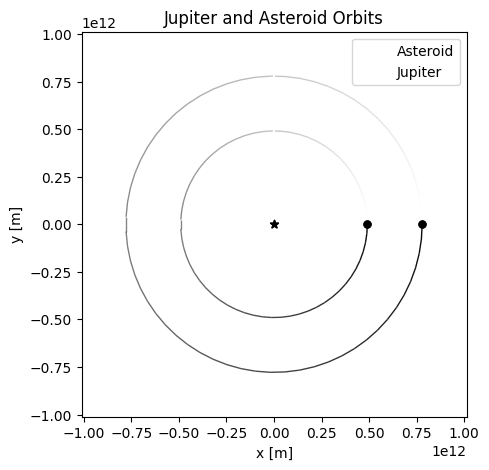

In [ ]:
fig = rebound.OrbitPlot(sim, unitlabel="[m]")
plt.title('Jupiter and Asteroid Orbits')
plt.plot(sim.particles[1].xyz, "w", label='Asteroid')
plt.plot(sim.particles[2].xyz, "w",  label='Jupiter')
plt.legend(loc = 'upper right')

<h3><b><u>Uso de Seaborn para graficar</b></h3>
<p align="right">
Ya con el codigo que se tenia en Matplotlib para generar las orbitas del planeta Jupiter y del asteroide, lo modificamos un poco para graficar con Seaborn las mismas orbitas, en las siguientes celdas se evidencia eso con dos graficos adicionales con Seaborn.
Este código crea un gráfico de dispersión de los valores de y utilizando range(len(y)) como índice para los datos. ya que si no proporcionamos el índice, Seaborn no podrá inferir el eje x y produciria un error.
</p>

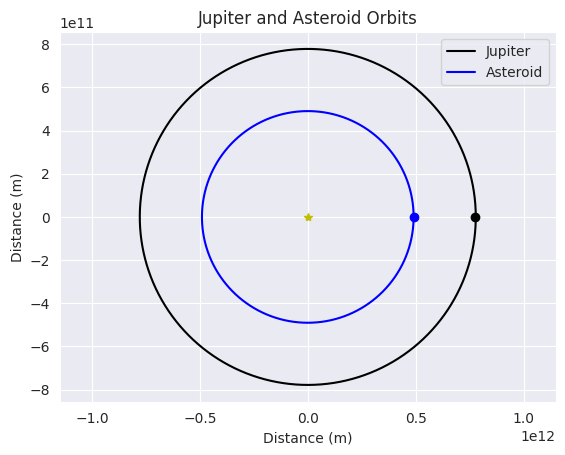

In [ ]:
# Plot orbits
import seaborn as sns

#customizing the appearance of the graph
sns.set_style("darkgrid")
sns.set_palette("husl")

plt.plot(x, y, 'y*')
plt.plot(x_planet, y_planet, 'k-', label='Jupiter')
plt.plot(x_ast, y_ast, 'b-',  label='Asteroid')
plt.plot(x1, y1, 'ko')
plt.plot(x2, y2, 'bo')

plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Jupiter and Asteroid Orbits')
plt.legend(loc = 'upper right')

plt.axis("equal") 

plt.show()



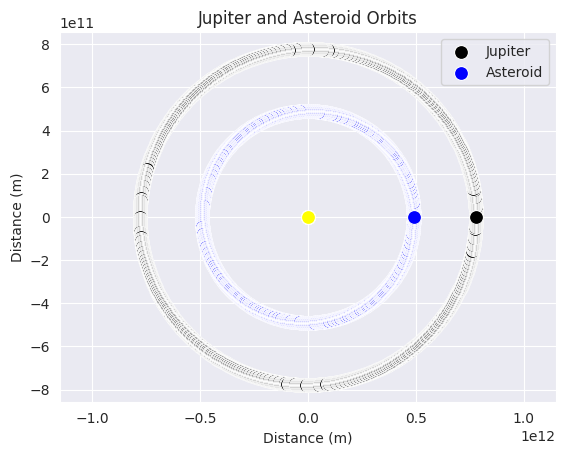

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot orbits
y = [1, 2, 3, 4, 5]

sns.scatterplot(x=range(len(y)), y=y)
sns.scatterplot(x=x, y=y, color='yellow', s=100)
sns.scatterplot(x=x_planet, y=y_planet, color='black', s=100, label='Jupiter')
sns.scatterplot(x=x_ast, y=y_ast, color='blue', s=100, label='Asteroid')

# Add labels and legend
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Jupiter and Asteroid Orbits')
plt.legend(loc='upper right')

plt.axis("equal") 

# Display plot
plt.show()


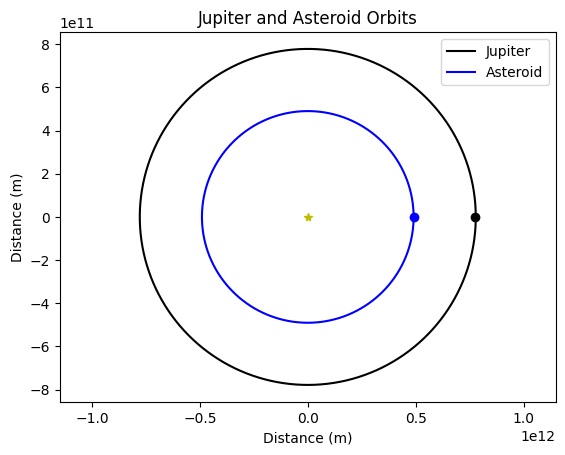

In [ ]:
# Plot orbits
plt.plot(x, y, 'y*')
plt.plot(x_planet, y_planet, 'k-', label='Jupiter')
plt.plot(x_ast, y_ast, 'b-',  label='Asteroid')
plt.plot(x1, y1, 'ko')
plt.plot(x2, y2, 'bo')

# Add labels and legend
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.title('Jupiter and Asteroid Orbits')
plt.legend(loc = 'upper right')

plt.axis("equal") 

# Display plot
plt.show()

In the graph above we represent the relative positions of Jupiter and an asteroid for the stable configuration when their orbital periods are in a 2:1 ratio. The diagram illustrates the configuration for t = 0.
The eccentricity of the asteroid's orbit is considered as e = 0, this is because we are considering the simplest case.

Given that the eccentricity of the asteroid's orbit is considered different from zero, this case would be when Jupiter and the asteroid are in conjunction and the asteroid is at the perihelion of its orbit

###Calculation of the period and the semimajor axis of asteroids for different values of q

####for q = 2

In [ ]:
# Resonance 3:1
p2 = 1 
q2 = 2 
e_asteroid = 0 # eccentricity for a circular orbit, is not the true eccentricity of asteroid orbit
T_asteroid = (p2/(p2+q2)) * T_planet # asteroid period 
t_ast = np.linspace(0, 2*np.pi, 1000)

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

####for q = 3

In [ ]:
# Resonance 4:1
p3 = 1 
q3 = 3 
e_asteroid = 0 # eccentricity for a circular orbit
T_asteroid = (p3/(p3+q3)) * T_planet # asteroid period 

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

if we note for q = 2, the resonance that is generated is 3:1; for q = 3, the resonance that occurs between the asteroid and the planet is 4:1, and so on.

In [ ]:
# Resonance 7:3
p4 = 3
q4 = 4
e_asteroid = 0 # eccentricity for a circular orbit
T_asteroid = (p4/(p4+q4)) * T_planet # asteroid period 

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

In [ ]:
# Resonance 5:2
p5 = 2
q5 = 3
e_asteroid = 0 # eccentricity for a circular orbit
T_asteroid = (p5/(p5+q5)) * T_planet # asteroid period 

# derived properties

n_asteroid = 2*np.pi/T_asteroid # mean motion of the asteroid
a_asteroid = mu**(1/3) * n_asteroid**(-2/3) # From Kepler's third law

print(f"the period of the asteroid: {T_asteroid} s = {T_asteroid/year} years") 
print(f"the major semiaxis of the asteroid: {a_asteroid} m = {a_asteroid/au} au")

##**Code for real asteroids**

The first thing we will do is get the semimajor axis and eccentricity of the asteroids of the main asteroid belt, then we intend to make a graph of the eccentricity vs semimajor axis (e vs a)

### Experiment 2: Plot of e vs a for different main belt asteroids



In [ ]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/colabs/Astrodinamica/asteroides-mb.csv")
df

####definition of important variables for the graph

In [ ]:
# Semi-major axis for an asteroid at different resonances with Jupiter
a_asteroid_21 = 3.2781 # with q=1 and p=1
a_asteroid_31 = 2.5017 # with q=2 and p=1
a_asteroid_41 = 2.0651 # with q=3 and p=1
a_asteroid_73 = 2.9580 # with q=1 and p=2
a_asteroid_52 = 2.8250 # with q=2 and p=2
e_fx = 0.45
xs = df["a"]
ys = df["e"]

####Graph a vs e

In [ ]:
plt.title("a vs e")
plt.xlabel('Major semiaxis (AU)')
plt.ylabel('Eccentricity')
plt.annotate("2:1",xy=(a_asteroid_21,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("3:1",xy=(a_asteroid_31,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("4:1",xy=(a_asteroid_41,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("5:2",xy=(a_asteroid_52,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.annotate("7:3",xy=(a_asteroid_73,e_fx),ha="center",color = "black", fontsize = 15, textcoords = "data")
plt.plot(xs,ys,marker="o",lw=0,markersize=0.01)
plt.axvline(a_asteroid_21, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_41, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_31, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_52, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))
plt.axvline(a_asteroid_73, color='grey', marker="o", linestyle = (0, (5, 1, 2, 1)))


The above graph represents the position of the resonances but with real asteroids from the main asteroid belt

### Now we will show the orbit of a moon around a planet so that the moon has periapsis precession.

In [ ]:
deg = np.pi/180
rad = 1/deg

the orbital elements of an asteroid with e = 0.5 are chosen

In [ ]:
q = 1
e = 0.5
inc = 0*deg
Omega = 0*deg
omega = 0*deg
M = 0*deg
t0 = 0
mu = 1
elementos = [q, e, inc, Omega, omega, M, t0, mu]

We use SPICE with the routine "conics" to calculate the position of the asteroid in space (Cartesian)

In [ ]:

estado = spy.conics(elementos, t0)

In [ ]:
r = estado[:3]
v = estado[3:]

In [ ]:
ts = np.linspace(0,10,100)
for t in ts:
    elementos = [q, e, inc, Omega, omega, M, t0, mu]
    estado = spy.conics(elementos, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ko')

plt.axis("equal")

###Now we will make the periapsis of the orbit precess

In [ ]:
ts = np.linspace(0,50,100)
omegap = 0.01 #the curlypi is fixed

for t in ts:

  omega = omegap*t
  elementos = [q, e, inc, Omega, omega, M, t0, mu]
  estado = spy.conics(elementos, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],"ko")

plt.axis("equal")

We notice that now omega has a different value at each time

In [ ]:
#Orbital elements of the disturbing planet

q2 = 3
e2 = 0
inc2 = 0*deg
Omega2 = 0*deg
omega2 = 0*deg
M2 = 0*deg

In [ ]:
ts = np.linspace(0,50,100)
omegap = 0.02

for t in ts:

    omega = omegap*t
    elementos = [q, e, inc, Omega, omega, M, t0, mu]
    estado = spy.conics(elementos, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ko')

    elementos2 = [q2, e2, inc2, Omega2, omega2, M2, t0, mu]
    estado = spy.conics(elementos2, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ro')

plt.axis("equal")

###To see the secular resonance

In [ ]:
t0 = 0
mu = 1

#Orbital elements of asteroid
q = 1
e = 0.7
inc = 0*deg
Omega = 0*deg
omega = 0*deg
M0 = 0*deg

#Orbital elements of the disturbing planet
q2 = 3
e2 = 0
inc2 = 0*deg
Omega2 = 0*deg
omega2 = 0*deg
M2 = 0*deg

In [ ]:
omegap = 0.05

omega_planet = omegap/2 ##Secular resonance 2:1
Tomega = 2*np.pi/omega_planet
ares = (mu/omega_planet**2)**(1/3)

ts = np.arange(0,Tomega,Tomega/100)

for i,t in enumerate(ts):

  omega = omegap * t
  elementos = [q, e, inc, Omega, omega, M0, t0, mu]
  estado = spy.conics(elementos, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],'ko',alpha=0.2)

  if i==0:
    plt.plot(r[0],r[1],'ko',ms=3)

  elementos2 = [ares, e2, inc2, Omega2, omega2, M2, t0, mu]
  estado = spy.conics(elementos2, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],"ro",alpha=0.2)

  if i==0:
    plt.plot(r[0],r[1],'ro',ms=3)

plt.axis("equal")

Let's animate the orbit at each time:

In [ ]:
from celluloid import Camera

In [ ]:
fig,ax=plt.subplots(1,1)
camera=Camera(fig)

ts = np.arange(0,Tomega+0.5*Tomega/20,Tomega/20)

for i,t in enumerate(ts):

  omega = omegap * t

  elementos = [q, e, inc, Omega, omega, M0, t0, mu]
  estado = spy.conics(elementos, t)
  r = estado[:3]
  v = estado[3:]
  plt.plot(r[0],r[1],'bo',ms=5)

  ##This plot the whole oscullant orbit at each time
  for M in np.linspace(0,2*np.pi,50):
    elementos = [q, e, inc, Omega, omega, M, t0, mu]
    estado = spy.conics(elementos, t)
    r = estado[:3]
    v = estado[3:]
    plt.plot(r[0],r[1],'ko',ms=1)

  elementos2 = [ares, e2, inc2, Omega2, omega2, M2, t0, mu]
  estado = spy.conics(elementos2, t)
  r = estado[:3]
  v = estado[3:]
  ax.plot(r[0],r[1],"ro",ms=5)
  ax.set_aspect("equal")
  camera.snap()

In [ ]:
from IPython.display import HTML
anim=camera.animate()
HTML(anim.to_html5_video())

## Seccion 8.3 The Physics of Resonance

###**External resonance of the Hyperion 3:4 satellite with Titan**

In [ ]:
import math

# Parámetros orbitales de Hiperión
a_h = 1500600  # semieje mayor en metros
e_h = 0.1034   # excentricidad
P_h = 21.276   # periodo orbital en días

# Parámetros orbitales de Titán
a_t = 1221865  # semieje mayor en metros
e_t = 0.0288   # excentricidad
P_t = 15.95    # periodo orbital en días

# Cálculo de las frecuencias orbitales
n_h = 2 * math.pi / P_h  # frecuencia orbital de Hiperión en radianes/día
n_t = 2 * math.pi / P_t  # frecuencia orbital de Titán en radianes/día

# Cálculo de la resonancia
r = n_h / n_t
if math.isclose(r, 3/4, rel_tol=1e-3):
    print("Hiperión y Titán están en resonancia 3:4")
else:
    print("Hiperión y Titán no están en resonancia 3:4")

###**Conjunctions**

We want to verify the following fact:

If the conjunctions always occur exactly at either pericentre or apocentre, then the tangential force experienced by the particle immediately before conjunction is equal and opposite to the tangential force experienced immediately after conjunction.

First, let's remember that a conjunction occurs when two celestial bodies are at the same point in their orbit. At this point, the distance between the bodies is minimum (at the pericenter) or maximum (at the apocenter). In both cases, the relative velocity between the bodies is maximum.

Suppose that the particle moves in an elliptical orbit around a massive object of mass $M$ and radius $r$. The position of the particle in the orbit is given by the polar coordinates $(r,\theta)$, where $r$ is the distance of the particle from the massive object and $\theta$ is the angle between the line joining the particle and the massive object and a reference axis.

$r=\frac{a(1−e^2)}{1+ecos(θ)}$

where $a$ is the semimajor axis of the ellipse and $e$ is the eccentricity of the ellipse.

The gravitational force experienced by the particle is:

$F=\frac{GMm}{r^2}$

where $G$ is the gravitational constant, $m$ is the mass of the particle, and $r$ is the distance between the particle and the massive object.

The tangential component of the gravitational force is:

$F_{t}​=Fsin(ϕ)$

where $\phi$ is the angle between the line joining the particle and the massive object and the tangential direction.

To calculate the tangential component of the gravitational force at the pericenter or apocenter, we need to find the angle $\phi$ at those points. At the pericenter and apocenter, the particle moves in the radial direction, so the tangential direction is perpendicular to the radial direction. Therefore, the angle $\phi$ is equal to the polar angle $\theta$ at the pericenter or apocenter.

At the pericenter, $r=r_{p}=a(1-e)$, and at the apocenter, $r=r_{a}=a(1+e)$. Therefore, the tangential force experienced by the particle immediately before the conjunction is:

$F_{t}^{bef}=\frac{GMm}{r^2}​sin(θ)$ 

and the tangential force experienced by the particle immediately after the conjunction is:

$F_{t}^{aft}=\frac{GMm}{r^{2}}sin(-\Theta )=-\frac{GMm}{r^{2}}sin(\Theta )$

where we use the trigonometric identity $\sin(-\theta)=-\sin(\theta)$.

Therefore, the tangential force experienced by the particle at the pericenter or apocenter is equal and opposite before and after conjunction.

**Now** Let us consider this mental analysis with a symmetrical orbit

At the point of conjunction, the relative velocity between the bodies is maximum and the kinetic energy is maximum. Therefore, the total energy of the system is maximum at this point.

Now, let us consider the situation immediately before and after the conjunction. In both cases, the distance between the bodies is very similar, but the direction of motion of the orbiting body is different. Due to the symmetry of the orbit, the gravitational force and the potential energy are the same before and after the conjunction. Therefore, the difference in total energy before and after the conjunction is due solely to the difference in kinetic energy.

Since the total energy of the system is conserved, the difference in kinetic energy before and after the conjunction must be equal and opposite. This means that the velocity of the orbiting body immediately before and after the conjunction is equal and opposite. Since the tangential force is proportional to the acceleration, and the acceleration is the rate of change of velocity, this means that the tangential force immediately before and after the conjunction is equal and opposite.

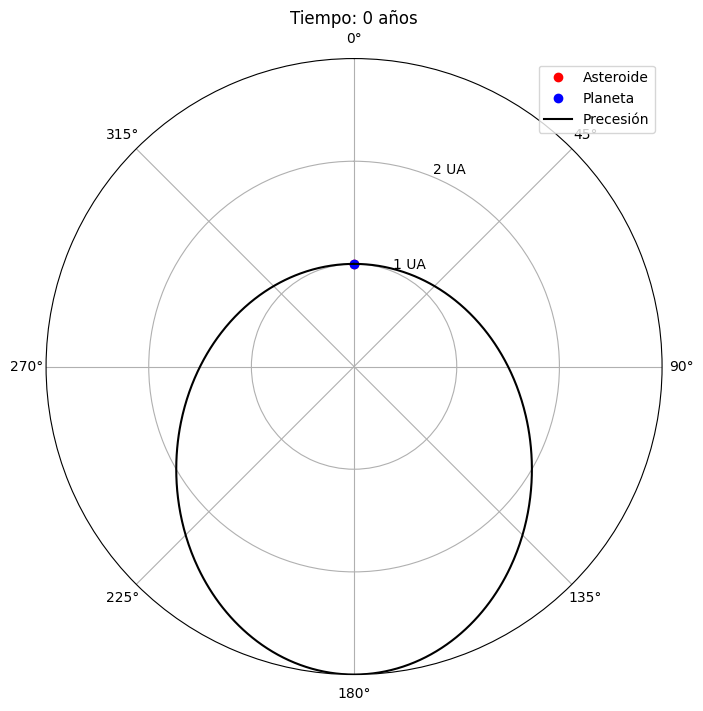

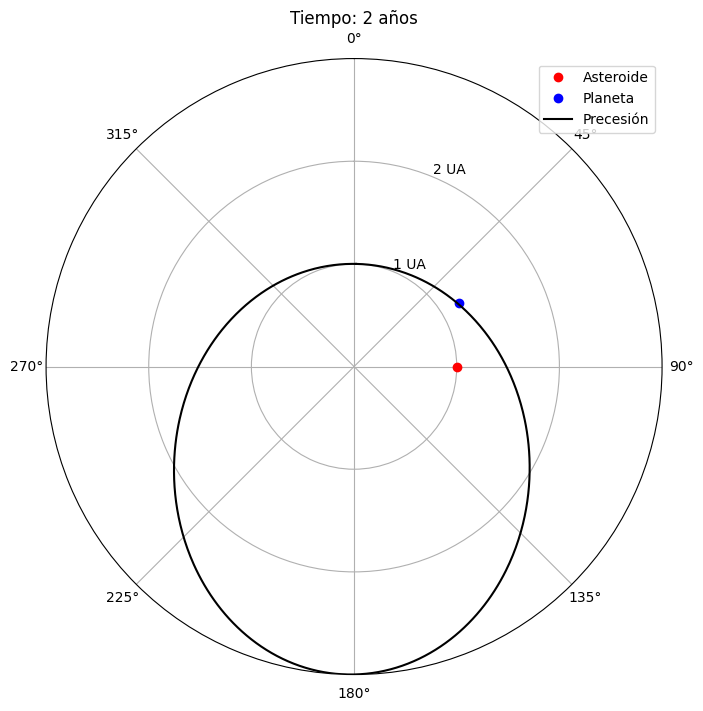

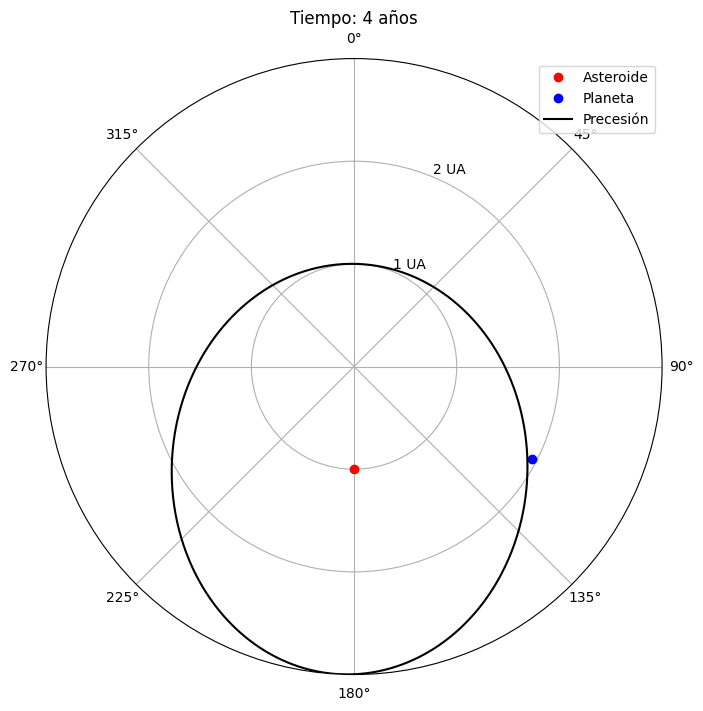

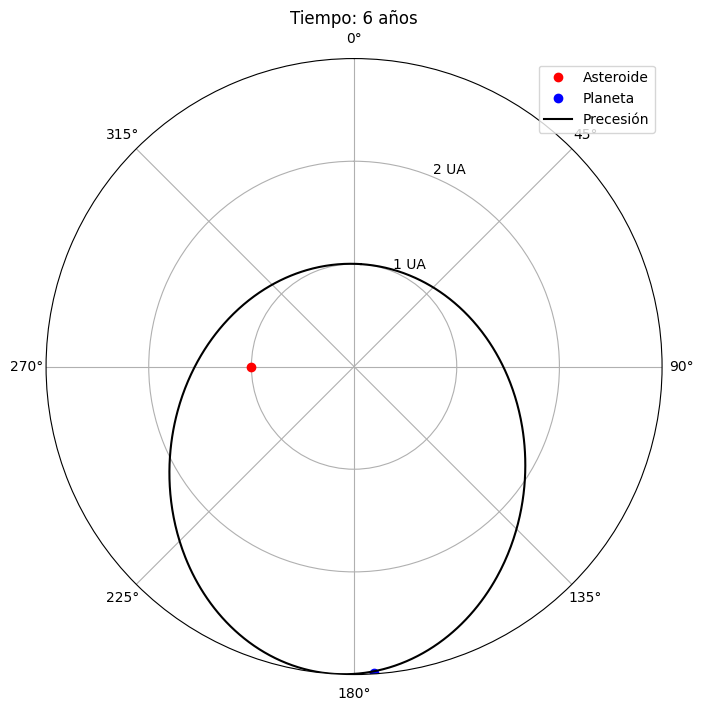

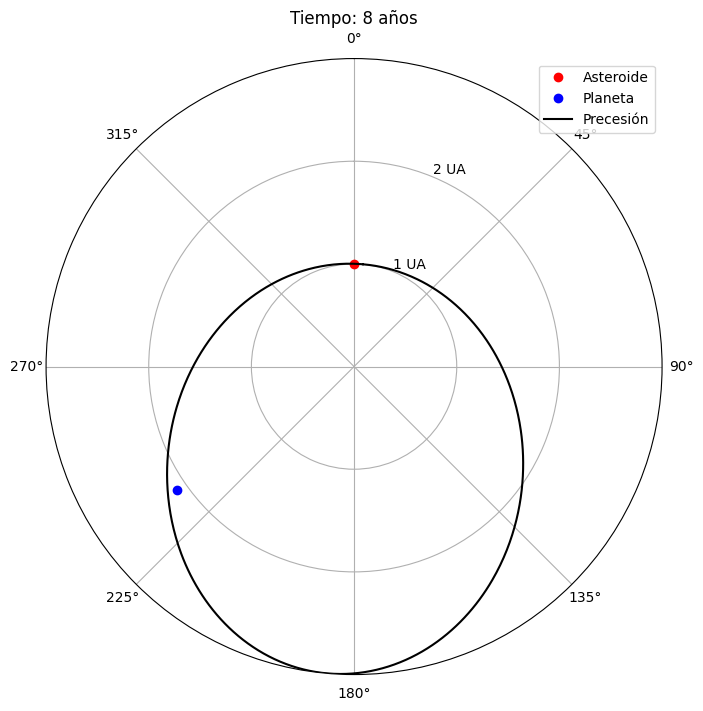

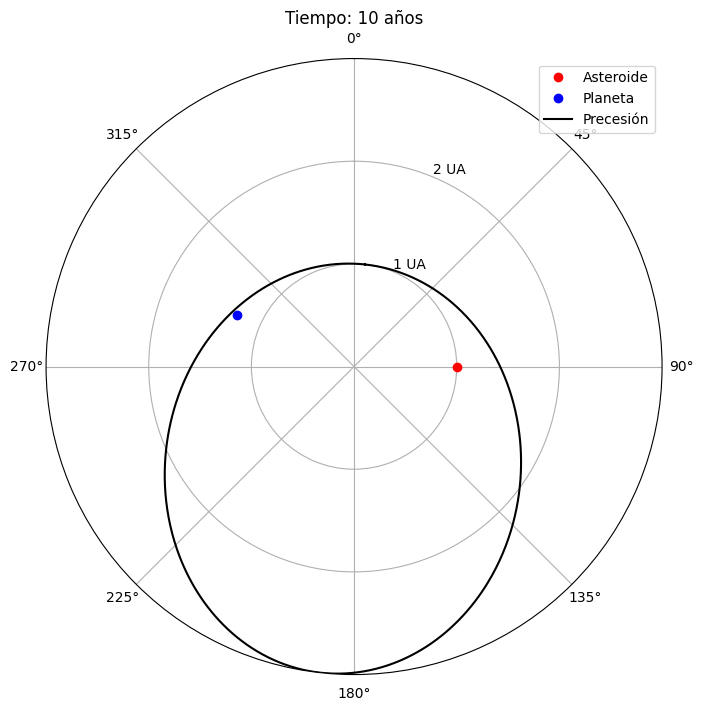

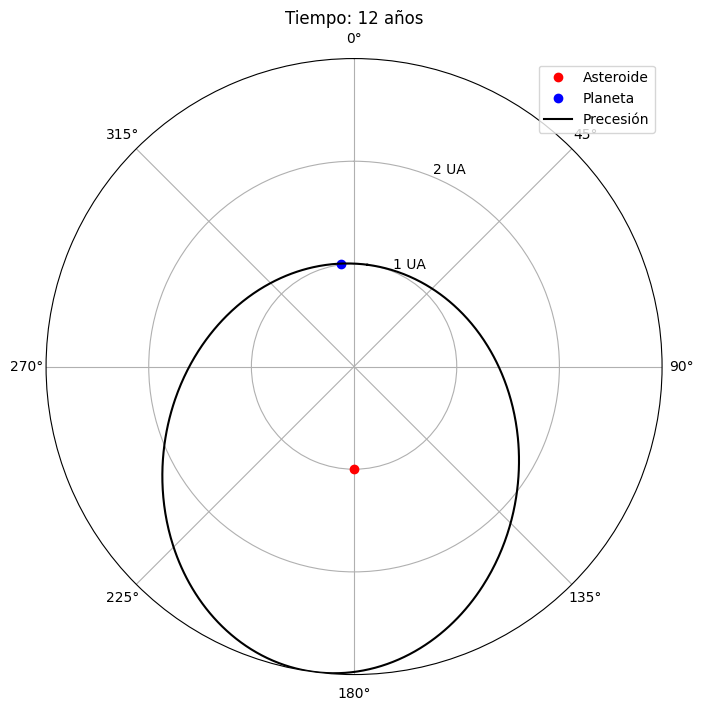

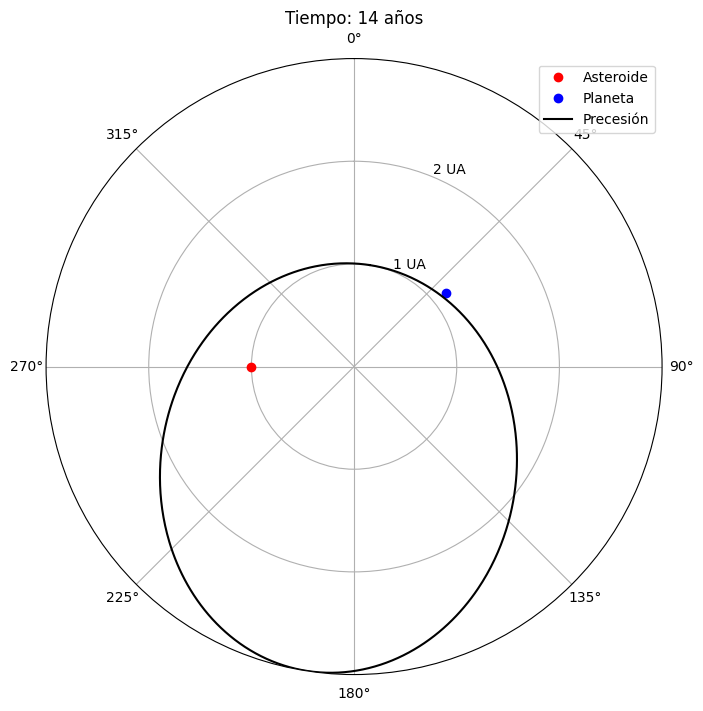

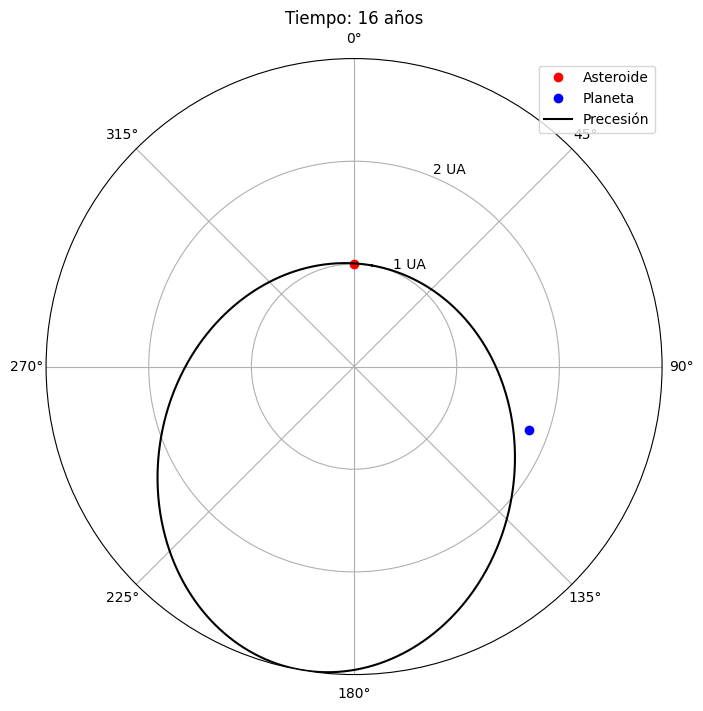

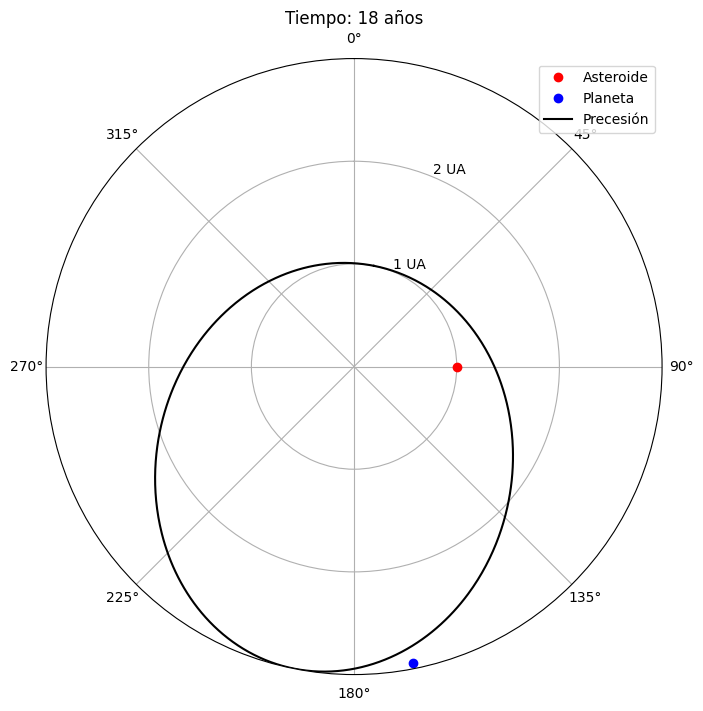

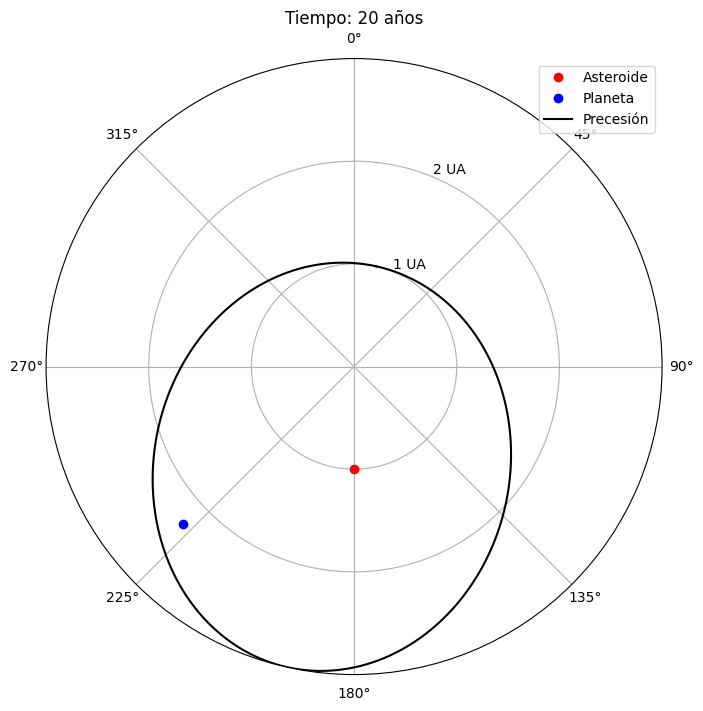

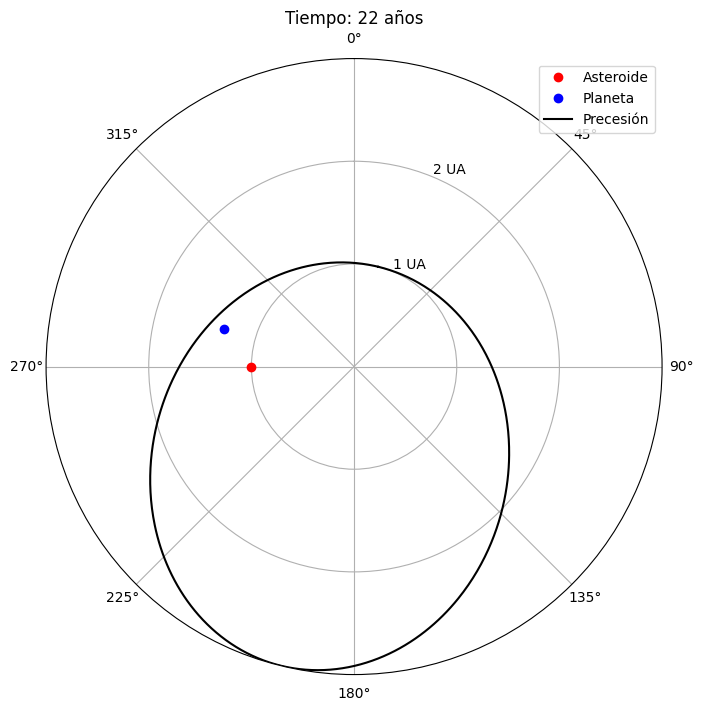

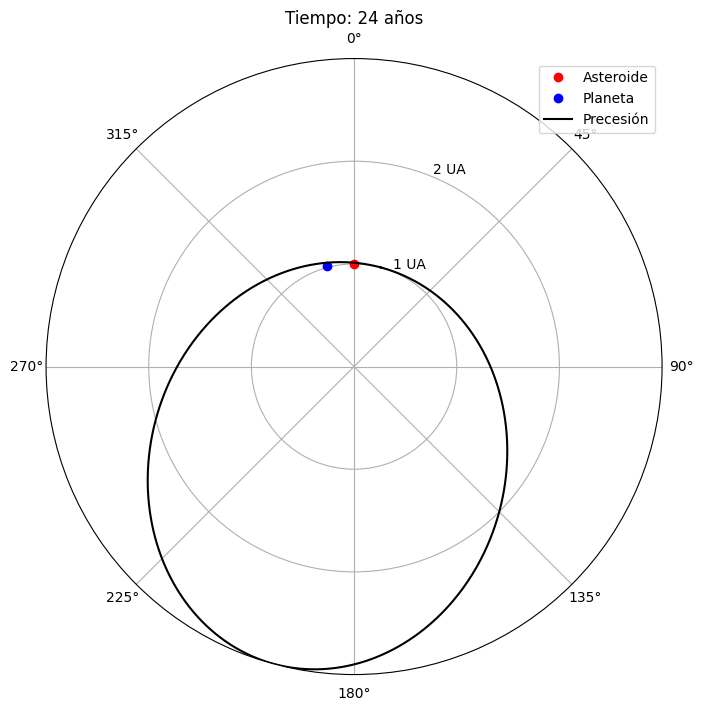

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros de los objetos
T_ast = 8  # periodo del asteroide en años
T_plan = 12  # periodo del planeta en años
T_prec = 24  # periodo de precesión del perihelio en años
a_plan = 2  # semieje mayor de la órbita del planeta en UA
e_plan = 0.5  # excentricidad de la órbita del planeta
omega = 2 * np.pi / T_prec  # velocidad angular de precesión del perihelio

# Cálculo de las posiciones cada 2 años
t_values = np.arange(0, 25, 2)
theta_ast_values = t_values / T_ast * 2 * np.pi
theta_plan_values = t_values / T_plan * 2 * np.pi - omega * t_values / T_prec
r_plan_values = a_plan * (1 - e_plan ** 2) / (1 + e_plan * np.cos(theta_plan_values))
theta_prec_values = np.arange(0, 2 * np.pi, 0.01)

# Graficación de las posiciones
for i in range(len(t_values)):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.set_ylim(0, 3)
    ax.set_yticks([1, 2])
    ax.set_yticklabels(['1 UA', '2 UA'])
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.plot(theta_ast_values[i], 1, 'ro', label='Asteroide')
    ax.plot(theta_plan_values[i], r_plan_values[i], 'bo', label='Planeta')
    ax.plot(theta_prec_values + omega * t_values[i] / T_prec, a_plan * (1 - e_plan ** 2) / (1 + e_plan * np.cos(theta_prec_values)), 'k-', label='Precesión')
    ax.set_title(f'Tiempo: {t_values[i]} años')
    plt.legend()
    plt.show()